## Installing and importing libraries

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

     ---------------------------------------- 1.6/1.6 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import tensorflow as tf
from tensorflow import keras
from svm_utils import*
from scipy import optimize
import seaborn as sns
from scipy.stats import norm #normal gausian distribution

sns.set(rc={'figure.figsize':(25.7,10.27)})


## Data Exploration and Visualization

In [29]:
def describe(df):                          # Function to explore major elements in a Dataset
                                           # Will help to find null values present and deal with them
    columns=df.columns.to_list()           # Function will help to directly find numerical and categorical columns
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('Name of all columns in the dataframe:')
    print(columns)
    print('')
    print('Number of columns in the dataframe:')
    print(len(columns))
    print('')
    print('Name of all numerical columns in the dataframe:')
    print(ncol)
    print('')
    print('Number of numerical columns in the dataframe:')
    print(len(ncol))
    print('')
    print('Name of all categorical columns in the dataframe:')
    print(ccol)
    print('')
    print('Number of categorical columns in the dataframe:')
    print(len(ccol))
    print('')
    print('------------------------------------------------------------------------------------------------')
    print('')
    print('Number of Null Values in Each Column:')
    print('')
    print(df.isnull().sum())
    print('')
    print('')
    print('Number of Unique Values in Each Column:')
    print('')
    print(df.nunique())
    print('')
    print('')
    print('Basic Statistics and Measures for Numerical Columns:')
    print('')
    print(df.describe().T)
    print('')
    print('')
    print('Other Relevant Metadata Regarding the Dataframe:')
    print('')
    print(df.info())
    print('')
    print('')

In [30]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
describe(df)

Name of all columns in the dataframe:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Number of columns in the dataframe:
18

Name of all numerical columns in the dataframe:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

Number of numerical columns in the dataframe:
14

Name of all categorical columns in the dataframe:
['Month', 'VisitorType', 'Weekend', 'Revenue']

Number of categorical columns in the dataframe:
4

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

In [32]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Administrative_Duration,0.60,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Informational,0.38,0.30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Informational_Duration,0.26,0.24,0.62,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ProductRelated,0.43,0.29,0.37,0.28,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,nan,nan,nan,nan,nan,nan,nan,nan,nan
PageValues,0.10,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,nan,nan,nan,nan,nan,nan,nan,nan
SpecialDay,-0.09,-0.07,-0.05,-0.03,-0.02,-0.04,0.07,0.10,-0.06,nan,nan,nan,nan,nan,nan,nan


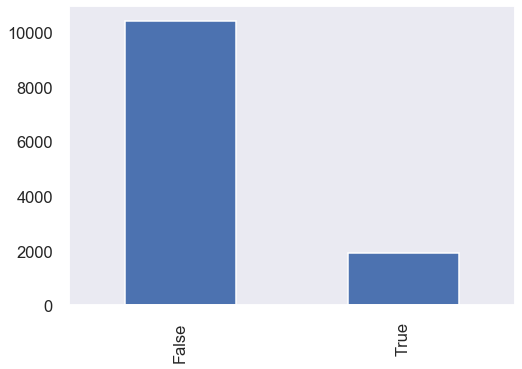

In [33]:
df.iloc[:,-1].value_counts().plot(kind='bar')
plt.grid()

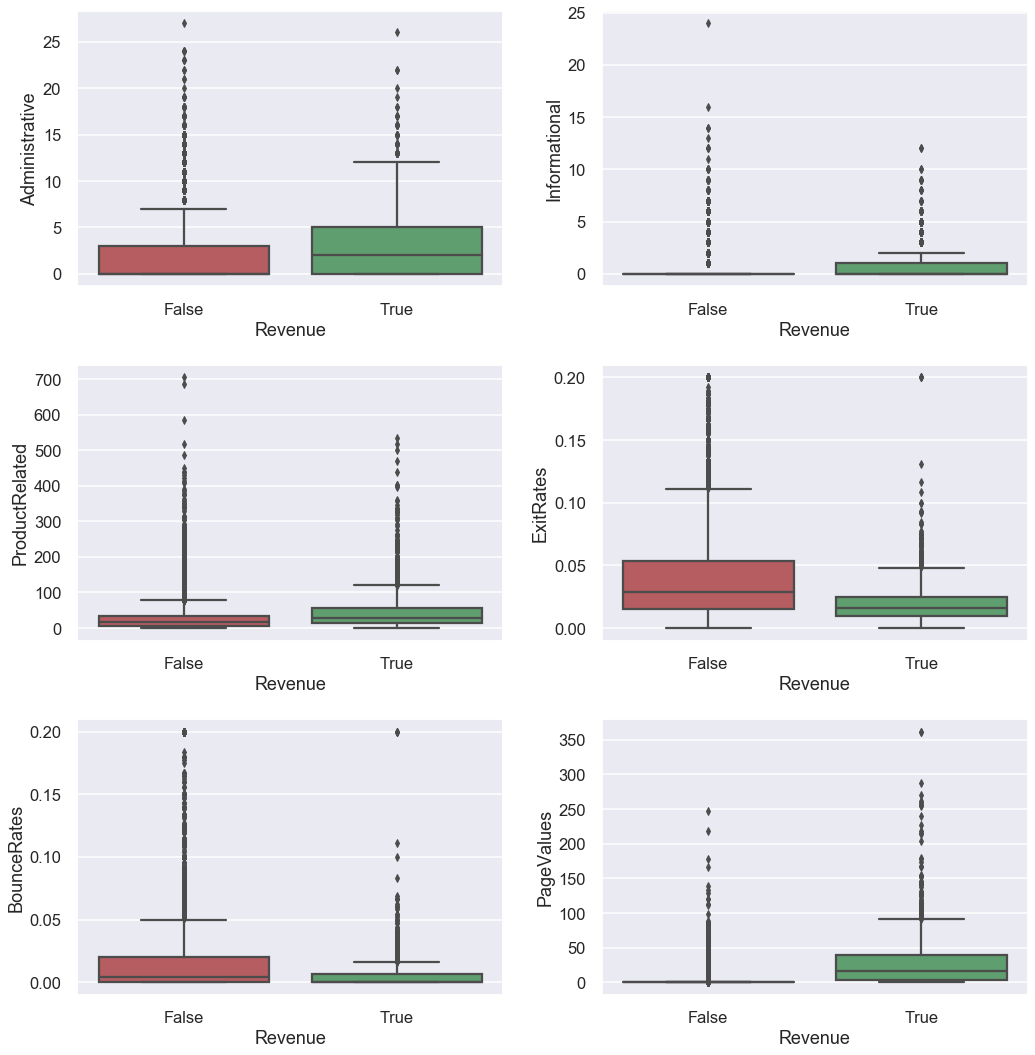

In [34]:
oe=['r','g']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="Administrative",x='Revenue',palette=oe)
#ax.set(xlabel='Sex ', ylabel='Count')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="Informational", x="Revenue",palette=oe)
#ax.set(xlabel='ChestPainType', ylabel='Count')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="ProductRelated", x="Revenue",palette=oe)
#ax.set(xlabel='ExerciseAngina', ylabel='Count')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="ExitRates", x="Revenue",palette=oe)
#ax.set(xlabel='RestingECG', ylabel='Count')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="BounceRates", x="Revenue",palette=oe)
#ax.set(xlabel='ST_Slope', ylabel='Count')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=df, y="PageValues", x="Revenue",palette=oe)
#ax.set(xlabel='FastingBS', ylabel='Count')

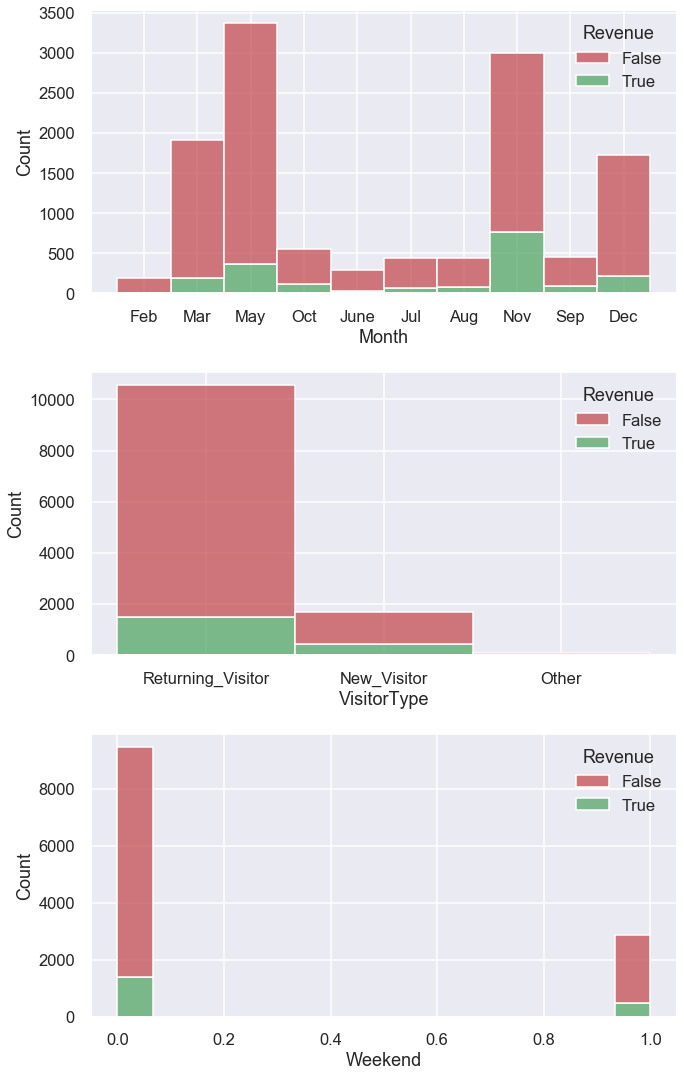

In [35]:
fig = plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Month", hue="Revenue",multiple="stack",palette=oe)


plt.subplot(3,1,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="VisitorType", hue="Revenue",multiple="stack",palette=oe)


plt.subplot(3,1,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Weekend", hue="Revenue",multiple="stack",palette=oe)




## Feature Selection

In [36]:
df['VisitorType'] = df['VisitorType'].map({'Returning_Visitor':2,'New_Visitor':1, 'Other':0})
df.insert(len(df.columns)-1, 'TotalDuration', 0)
df['TotalDuration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Revenue'] = df['Revenue'].map({True:1,False:0})
df.drop(columns=['Month', 'Weekend','Administrative_Duration','Informational_Duration','SpecialDay'], axis=1, inplace=True)
df.drop(columns=['ProductRelated_Duration','BounceRates','OperatingSystems','Browser','Region','TrafficType'] ,axis=1, inplace=True)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
X_train, X_test, y_train, y_test = train_test_split(df.values[:, 0:-1], df.values[:,-1],test_size=0.25,random_state=0)
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [38]:
features = list(df.columns.values)

In [39]:
features

['Administrative',
 'Informational',
 'ProductRelated',
 'ExitRates',
 'PageValues',
 'VisitorType',
 'TotalDuration',
 'Revenue']

In [40]:
rf.feature_importances_

array([0.0658555 , 0.02898752, 0.11204636, 0.14759554, 0.47749504,
       0.01165113, 0.15636891])

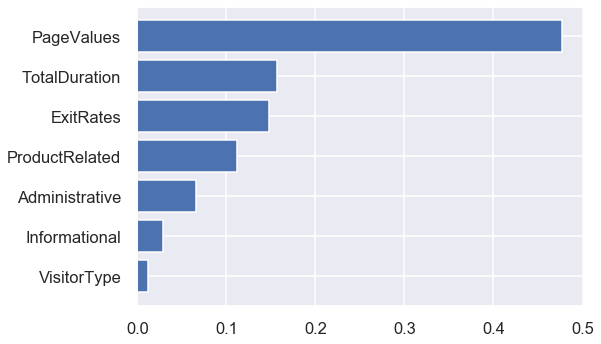

In [41]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

## Data Preprocessing and Cleaning

In [42]:
df.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,VisitorType,TotalDuration,Revenue
0,0,0,1,0.20,0.0,2,0.000000,0
1,0,0,2,0.10,0.0,2,64.000000,0
2,0,0,1,0.20,0.0,2,0.000000,0
3,0,0,2,0.14,0.0,2,2.666667,0
4,0,0,10,0.05,0.0,2,627.500000,0


In [46]:

def outliers(df_column):
    q75, q25 = np.percentile(df_column, [75 ,25]) 
    iqr = q75 - q25
    print('q75: ',q75)
    print('q25: ',q25)
    print('Inter Quartile Range: ',iqr)
    print('Outliers lie before', q25-2*iqr, 'and beyond', q75+1.8*iqr) 

    # Usually 1.5 times IQR is considered, but we have used 1.8 for broader range

    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <q25-1.8*iqr]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>q75+1.8*iqr]))
    plt.tight_layout()
    plt.style.use('seaborn')
    sns.set_context('notebook')
    sns.histplot(data=df, x=df_column, hue="Revenue",multiple="stack",palette=oe, kde=True)
    plt.show()

q75:  3.0
q25:  0.0
Inter Quartile Range:  3.0
Outliers lie before -6.0 and beyond 8.4
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 562


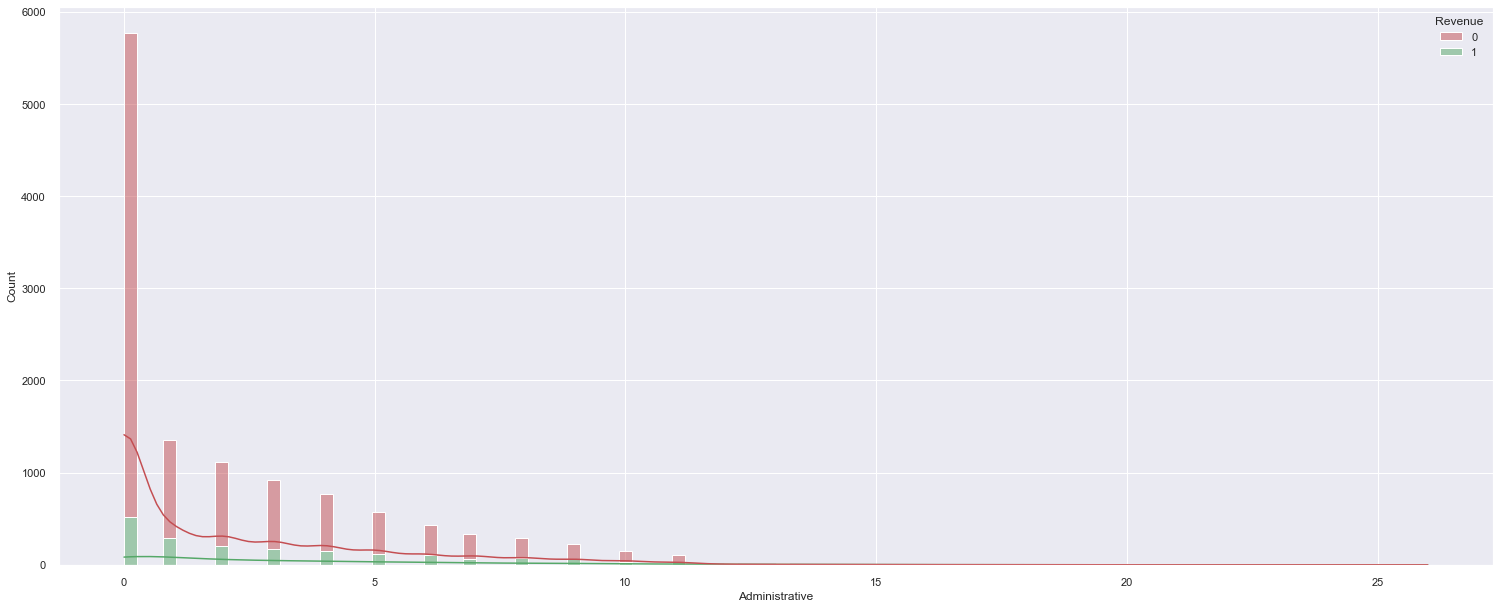

In [47]:
#Administrative	Informational	ProductRelated	ExitRates	PageValues	SpecialDay	TotalDuration	Revenue
outliers(df['Administrative'])

In [51]:
df.drop(df[(df['Administrative'] > 11.2) & (df['Revenue'] == 0)].index, inplace=True)

q75:  0.0
q25:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2333


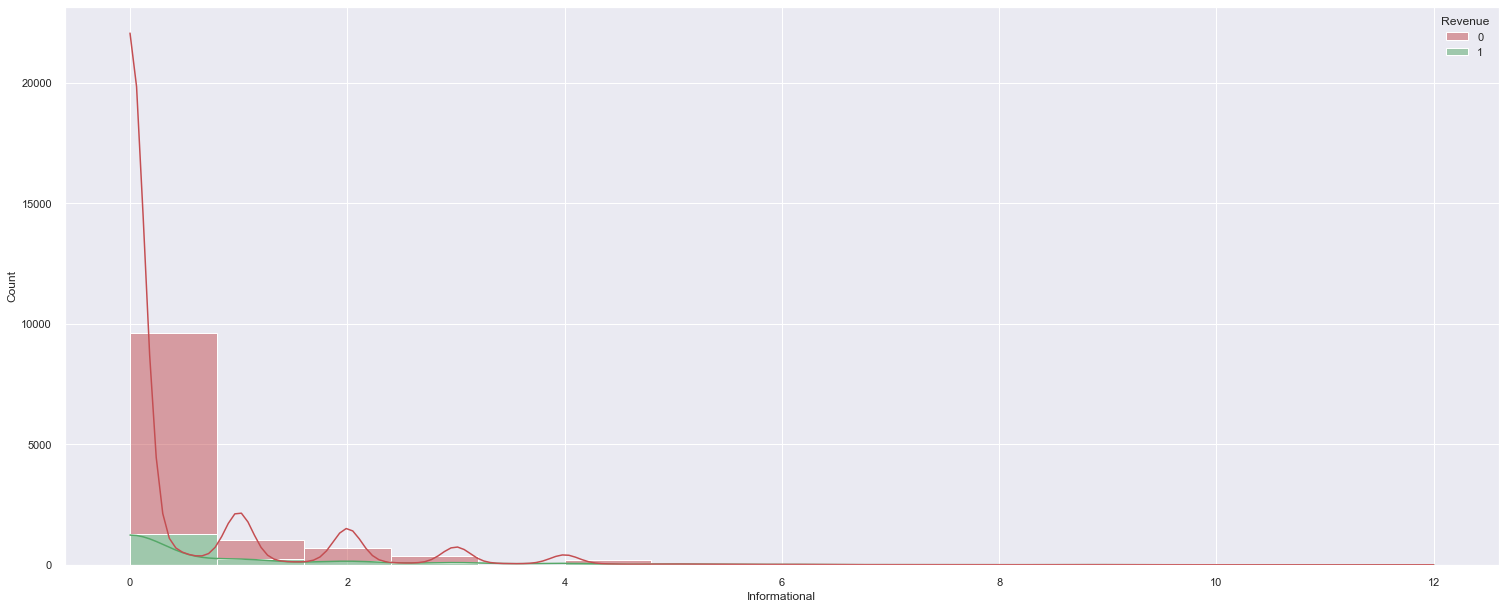

In [53]:

outliers(df['Informational'])

In [54]:
df.drop(df[(df['Informational'] > 4) & (df['Revenue'] == 0)].index, inplace=True)

q75:  36.0
q25:  7.0
Inter Quartile Range:  29.0
Outliers lie before -51.0 and beyond 88.2
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 786


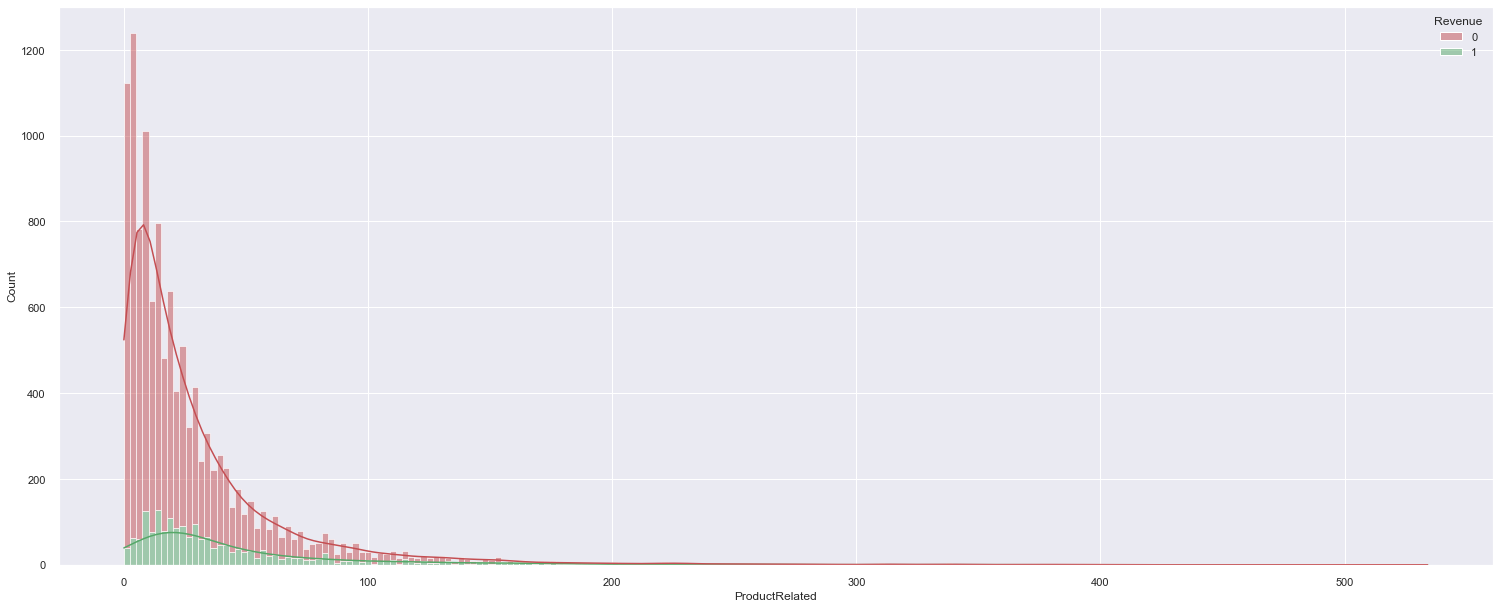

In [56]:

outliers(df['ProductRelated'])

In [390]:
df.drop(df[(df['ProductRelated'] > 89) & (df['Revenue'] == 0)].index, inplace=True)

q75:  0.05
q25:  0.014285714
Inter Quartile Range:  0.035714286000000005
Outliers lie before -0.05714285800000001 and beyond 0.11428571480000001
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 1040


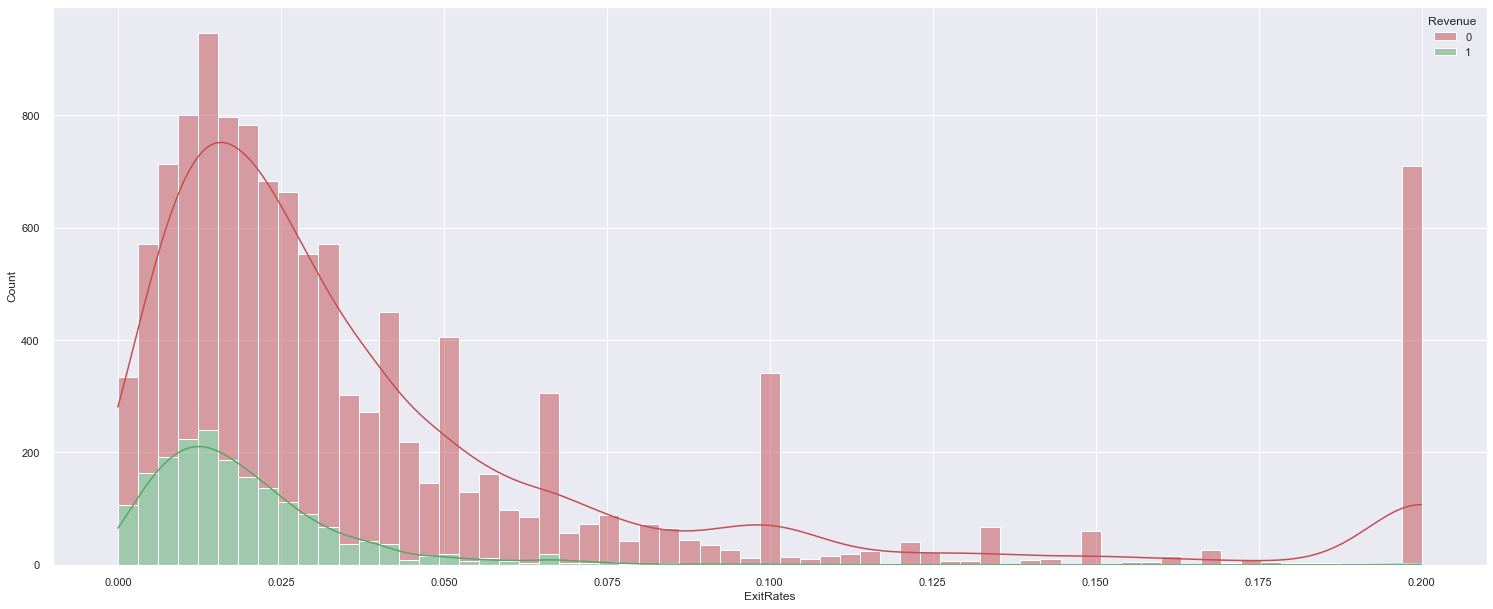

In [57]:

outliers(df['ExitRates'])

In [392]:
df.drop(df[(df['ExitRates'] > 0.114) & (df['Revenue'] == 0)].index, inplace=True)

q75:  1540.3385420000002
q25:  211.33333333000002
Inter Quartile Range:  1329.0052086700002
Outliers lie before -2446.6770840100003 and beyond 3932.5479176060007
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 708


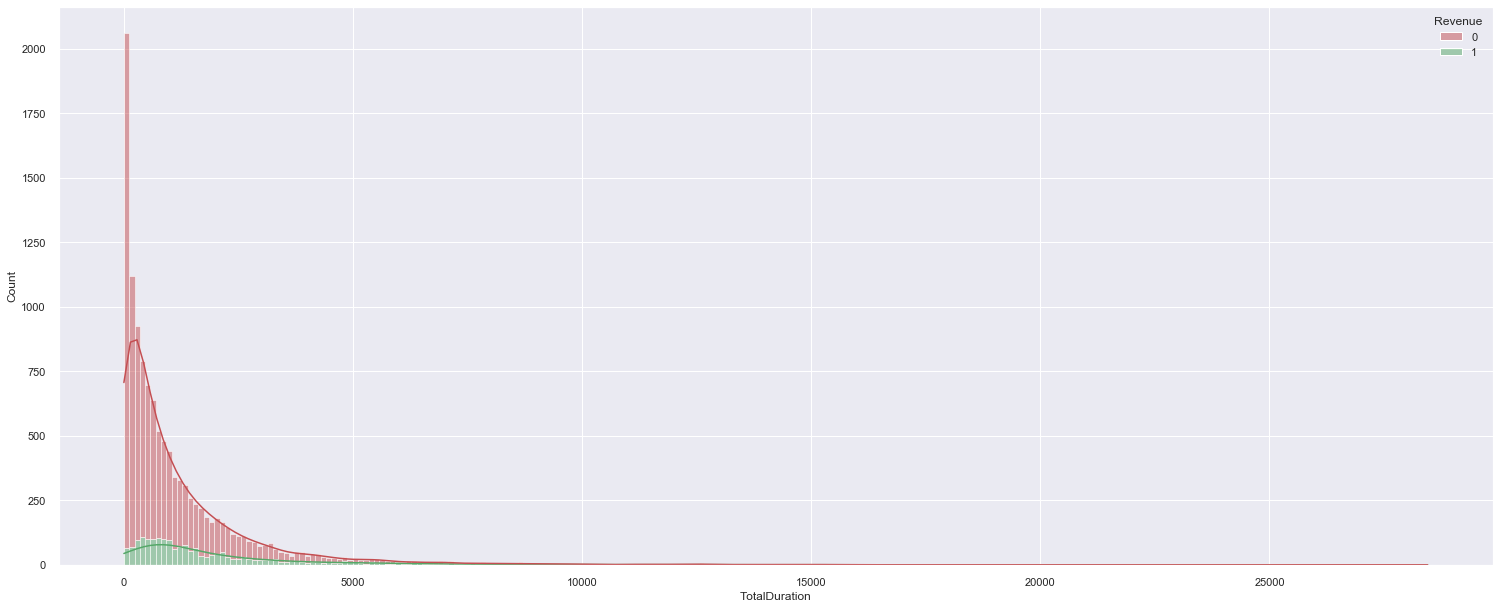

In [58]:

outliers(df['TotalDuration'])

In [59]:
df.drop(df[(df['TotalDuration'] > 3656) & (df['Revenue'] == 0)].index, inplace=True)

In [60]:
df

,Administrative,Informational,ProductRelated,ExitRates,PageValues,VisitorType,TotalDuration,Revenue
0,0,0,1,0.200000,0.000000,2,0.000000,0
1,0,0,2,0.100000,0.000000,2,64.000000,0
2,0,0,1,0.200000,0.000000,2,0.000000,0
3,0,0,2,0.140000,0.000000,2,2.666667,0
4,0,0,10,0.050000,0.000000,2,627.500000,0
...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,2,1928.791667,0
12326,0,0,5,0.021333,0.000000,2,465.750000,0
12327,0,0,6,0.086667,0.000000,2,184.250000,0
12328,4,0,15,0.021053,0.000000,2,421.000000,0


In [61]:
for column in df.columns:
    df[column] = df[column] / df[column].abs().max()

In [62]:
def PCA(X , num_components):
  
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index][0:num_components]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced, sorted_eigenvalue

In [63]:
X_PCA, lambdas = PCA(df.values[:, 0:-1],5)

In [64]:
for i in lambdas:
    print(i/lambdas.sum())

0.5443850226676203
0.28787163201095883
0.09905448144544234
0.04039349848973198
0.028295365386246506


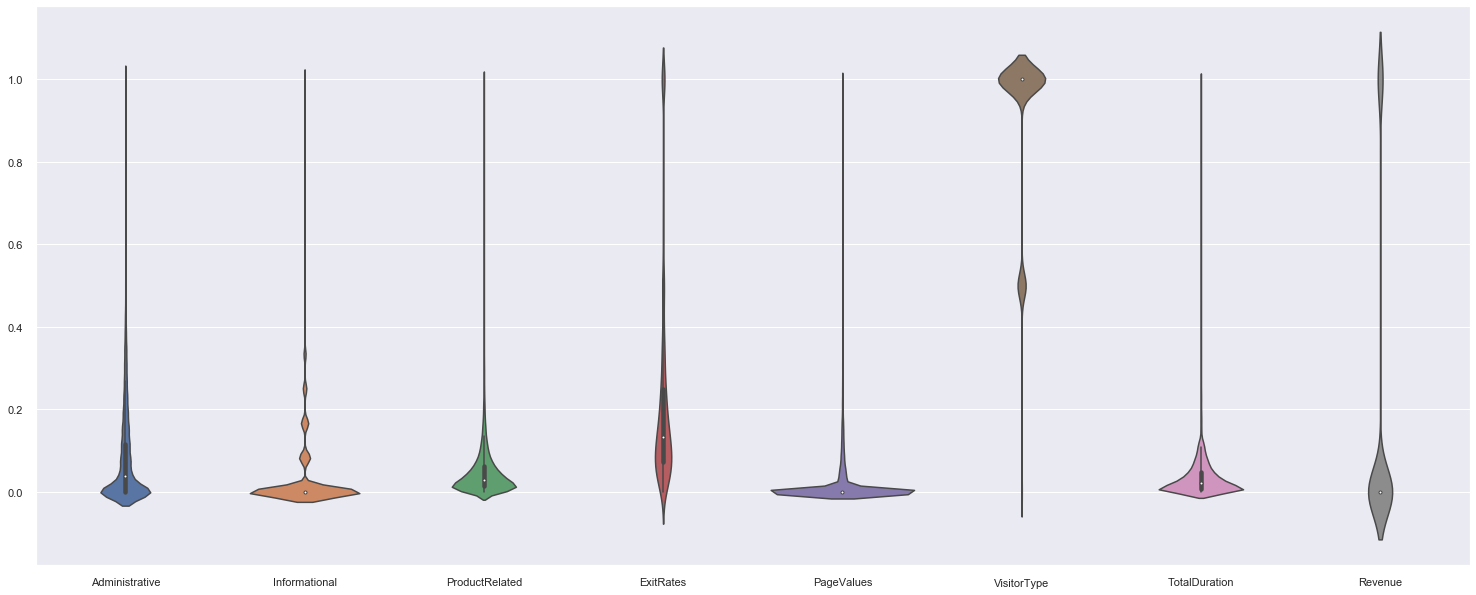

In [65]:

sns.violinplot(data= df)

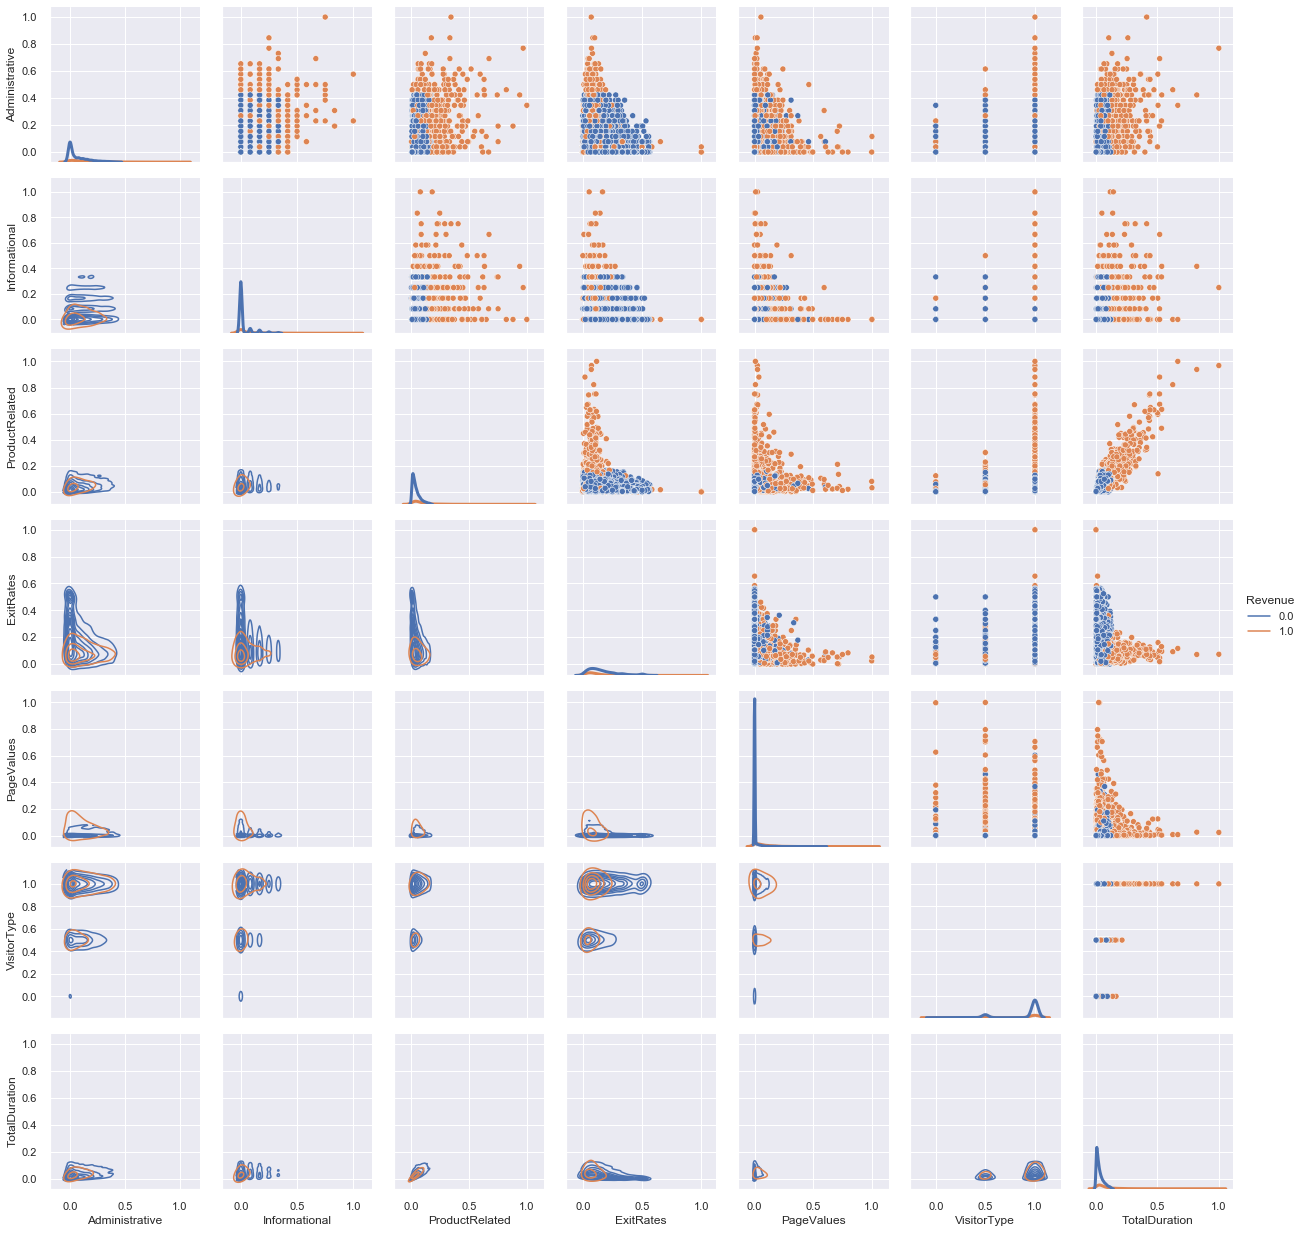

In [296]:
g = sns.PairGrid(df, hue = "Revenue")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)
g.add_legend()


## Logistic Regression

In [234]:
class LogisticRegression:
    def __init__(self, X,y,learningRate, tolerance, maxIteration, threshold) ->  None:
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.threshold = threshold
    
    #funtion to load the dataset
    def split(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X,self.y,test_size=0.25,random_state=42)
        sm = SMOTEENN(random_state=0)
        X_train, y_train = sm.fit_resample(X_train, y_train)
        return X_train, X_test, y_train, y_test

    
    #for gradiant descent,the functions we might need are- 
    #1) sigmoid function
    #2) cost function and
    #3) its cost derivative
    #4) fit function
    #5) evaluate function
    #6) predict function
    def sigmoid(self, z):
        sig = 1/(1 + np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        
        sig = self.sigmoid(X.dot(self.w))
        #approch 1
        #cost = (y * np.log(sig) + (1-y) * np.log(1 - sig)).sum()
        #cost = -cost / X.shape[0]
        
        #approch 2
        cost = (np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w)) - X.dot(self.w).dot(y)))
        cost = cost.sum()
        
        return cost #do a comparison by selecting each and checking
    
    def gradiant(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        gradiant = (sig - y).dot(X)
        return gradiant
    
    def normalizeTrainData(self, X):
        mean = np.mean(X,0)
        std = np.std(X,0)
        X_norm = (X-mean)/std

        return X_norm, mean, std

    def normalizeTestData(self, X, mean, std):
        X_norm = (X-mean)/std

        return X_norm  
    
    def gradientDescent(self, X,y):
        errors=[] #vector to keep track of the errors
        last_error = float('inf')# last error for comparison
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradiant(X,y)
            
            current_error = self.costFunction(X , y)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)
            
            if np.abs(diff) < self.tolerance:
                print('model stopped learning')
                break
            
        return
    
    #after the trainig is done and youve gotten the w that you want
    #when you want to make a prediction you care about the prob of it belonging
    #to class 1, which is you have to put it in a sigmoid on which you keep a threshold
        
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w)) #it gives you the probability
        #of it belonging to class 1
        return np.where(sig > self.threshold, 1, 0)
    
    
    
    def evaluate(self, y, y_hat):
        y = (y==1) # to convert the vector values to boolean for ease of calc.
        y_hat = (y_hat == 1) # to convert the vector values to boolean for ease of calc.
        # to check everywhere that each has correctly classified as true
        recall = (y & y_hat).sum() / y.sum() #recall = the total that were actually positive out of the classified positive
        precision = (y & y_hat).sum() / y_hat.sum()
        
        f_score = 2*(precision * recall)/(precision + recall)
        return f_score, recall, precision
    
    def fit(self):
        X_train, X_test, y_train, y_test = self.split()
        fold_grad= np.zeros(X_train.shape[1],)
        XT = np.array_split(X_train,5)
        YT = np.array_split(y_train,5)
        for i in range (4,-1,-1):
            X_train = np.delete(XT,i,0)
            X_train = np.concatenate(X_train)
            y_train = np.delete(YT,i,0)
            y_train = np.concatenate(y_train)
            X_val = XT[i]
            y_val = YT[i]
            print(" ")
            print(" ")
            print('Training Fold ',i+1)
            print(" ")
            print(" ")
            print('Solving using gradiant Descent')
            self.w = np.ones(X_train.shape[1], dtype = np.float64) * 0 #random inniatialization of w's
            self.gradientDescent(X_train, y_train)
            print(self.w)
            fold_grad = np.add(fold_grad,self.w)
            
            y_train_hat = self.predict(X_val)
            print(y_train_hat[0:5])#predict the values
            f_score, recall, precision = self.evaluate(y_val, y_train_hat) #evaluation
            #print('')
            #print('')
            #print('The train F1 score of the model is {}'.format(f_score))
            #print('The train recall of the model is {}'.format(recall))
            print('The train precision of the model is {}'.format(precision))
            
        print("  ")
        print("TEST SET RESULTS")
        print("  ")
        
        self.w = np.divide(fold_grad,5)
        print(self.w)
        y_train_hat = self.predict(X_test) #predict the values
        f_score, recall, precision = self.evaluate(y_test, y_train_hat) #evaluation
        print('')
        print('')
        print('The train F1 score of the model is {}'.format(f_score))
        print('The train recall of the model is {}'.format(recall))
        print('The train precision of the model is {}'.format(precision))


        
        




In [235]:
lr = LogisticRegression(df.values[:, 0:-1], df.values[:,-1],learningRate= 0.005, 
                        tolerance= 0.00005, maxIteration= 20000, threshold = 0.9)
lr.fit()

  0%|▎                                                                             | 95/20000 [00:00<00:21, 940.62it/s]

 
 
Training Fold  5
 
 
Solving using gradiant Descent


  0%|▎                                                                             | 83/20000 [00:00<00:24, 822.13it/s]

[  0.89145699   3.2374509   10.70740067  -1.35368352 137.34835192
  -3.7660746   14.14916896]
[0 0 0 0 1]
The train precision of the model is 1.0
 
 
Training Fold  4
 
 
Solving using gradiant Descent


  1%|▍                                                                           | 103/20000 [00:00<00:19, 1009.82it/s]

[  0.31833144   3.41554188  11.56944366  -1.66696253 138.08635035
  -3.68065821  12.78487134]
[0 1 1 1 1]
The train precision of the model is 1.0
 
 
Training Fold  3
 
 
Solving using gradiant Descent


  1%|▍                                                                           | 104/20000 [00:00<00:19, 1030.10it/s]

[  0.89818572   3.20496824  10.88541823  -0.88799411 151.28022324
  -3.02343284  13.72074494]
[0 1 0 0 0]
The train precision of the model is 0.9907578558225508
 
 
Training Fold  2
 
 
Solving using gradiant Descent


  1%|▋                                                                            | 189/20000 [00:00<00:21, 932.21it/s]

[ 2.15392206e+00  2.82021425e+00  1.28666426e+01  8.45956271e-02
  1.62897650e+02 -3.86179455e+00  1.17112560e+01]
[0 0 0 0 0]
The train precision of the model is 0.0
 
 
Training Fold  1
 
 
Solving using gradiant Descent


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:21<00:00, 951.18it/s]

[  1.56599606   3.97394648  10.95628705   0.529941   169.41098736
  -2.73485537  13.58844563]
[0 0 0 0 0]
The train precision of the model is 0.0
  
TEST SET RESULTS
  
[  1.16557845   3.33042435  11.39703844  -0.65882071 151.80471249
  -3.41336311  13.19089737]


The train F1 score of the model is 0.7222857142857144
The train recall of the model is 0.7133182844243793
The train precision of the model is 0.7314814814814815


## Neural Network

In [236]:
X_train, X_test, y_train, y_test = train_test_split(df.values[:, 0:-1], df.values[:,-1],test_size=0.25,random_state=0)
sm = SMOTEENN(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
weights = {0:1, 1:1}
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,kernel_initializer='he_uniform'),
    keras.layers.Dense(16, activation=tf.nn.relu),
     keras.layers.Dense(8, activation=tf.nn.relu),
    
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=512,class_weight = weights)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/40
20/20 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.5378
Epoch 2/40
20/20 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6930
Epoch 3/40
20/20 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7667
Epoch 4/40
20/20 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.8064
Epoch 5/40
20/20 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7964
Epoch 6/40
20/20 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7962
Epoch 7/40
20/20 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8007
Epoch 8/40
20/20 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8126
Epoch 9/40
20/20 [==============================] - 0s 1ms/step - loss: 0.3709

In [237]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.9)
y_pred = np.concatenate(y_pred)

In [238]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1932  129]
 [ 124  365]]


In [239]:
result = pd.DataFrame(data=np.column_stack((y_test,y_pred)),columns=['Actual','Prediction'])
result.head()

,Actual,Prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


In [240]:
TN = len(result[(result.Actual==0) & (result.Prediction==0)])
TP = len(result[(result.Actual==1) & (result.Prediction==1)])
FP = len(result[(result.Actual==0) & (result.Prediction==1)])
FN = len(result[(result.Actual==1) & (result.Prediction==0)])
Total = len(result)
print('Model Accuracy is: ', (TP + TN) / Total)
print('Model Precision is: ', (TP / (TP + FP)))
print('Model Recall is: ', (TP / (TP + FN)))
print('F1 score is: ', (TP / (TP + 0.5*(FP + FN))))

Model Accuracy is:  0.9007843137254902
Model Precision is:  0.7388663967611336
Model Recall is:  0.7464212678936605
F1 score is:  0.7426246185147508


In [241]:
from sklearn.metrics import f1_score
def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.501, 0.01):
        score = f1_score(y_true, np.array(y_pred)>thresh)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

In [242]:
bestThresshold(result['Actual'],result['Prediction'])

(0.7426246185147507, 0.1)

## Hard Margin SVM

In [243]:
y = df.iloc[:,-1]
y = np.where(y== True,1,-1)

X_train, X_test, y_train, y_test = train_test_split(df.values[:, 0:-1], y,test_size=0.25,random_state=0)
sm = SMOTEENN(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [244]:
class SVM():
    def __init__(self, learningrate = 0.0001, lamda = 0.001, niterations = 1000):
        self.learningrate = learningrate
        self.lamda = lamda
        self.niterations = niterations
    
    def fit(self,X,y):

        nsamples, nfeatures = X.shape

        self.w = np.zeros(nfeatures)
        self.b = 0

        #gradient descent

        for _  in range(self.niterations):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(self.w, x_i) +self.b)
                if condition >= 1:
                    self.w = self.w -  self.learningrate * (2 * self.lamda * self.w)
                else:
                # update both w and b
                    self.w = self.w - self.learningrate * ((2*(self. lamda * self.w)) - np.dot(y[idx],x_i))
                    self.b = self.b - self.learningrate * (-y[idx])
    def predict(self,X):
        pred = np.dot(X,self.w)+ self.b
        return np.sign(pred)


In [245]:
clfsvm = SVM()

In [246]:
clfsvm.fit(X_train,y_train)

In [247]:
y_pred= clfsvm.predict(X_test)

In [248]:
result = pd.DataFrame(data=np.column_stack((y_test,y_pred)),columns=['Actual','Prediction'])


In [249]:
result

,Actual,Prediction
0,-1.0,-1.0
1,-1.0,1.0
2,-1.0,-1.0
3,1.0,-1.0
4,-1.0,-1.0
...,...,...
2545,-1.0,1.0
2546,-1.0,1.0
2547,-1.0,1.0
2548,-1.0,-1.0


In [250]:
TN = len(result[(result.Actual==-1) & (result.Prediction==-1)])
TP = len(result[(result.Actual==1) & (result.Prediction==1)])
FP = len(result[(result.Actual==-1) & (result.Prediction==1)])
FN = len(result[(result.Actual==1) & (result.Prediction==-1)])
Total = len(result)
print('Model Accuracy is: ', (TP + TN) / Total)
print('Model Precision is: ', (TP / (TP + FP)))
print('Model Recall is: ', (TP / (TP + FN)))
print('F1 score is: ', (TP / (TP + 0.5*(FP + FN))))

Model Accuracy is:  0.7019607843137254
Model Precision is:  0.3808267370272647
Model Recall is:  0.885480572597137
F1 score is:  0.5325953259532595


In [251]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1357  704]
 [  56  433]]


## Gaussian Naive Bayes

In [252]:
#its non parametric, so you dont need to define parameters here
class GaussianNaiveBayes:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def splitData(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                           test_size = 0.3,
                                                           random_state = 1)
        sm = SMOTEENN(random_state=0)
        X_train, y_train = sm.fit_resample(X_train, y_train)
        return X_train, X_test, y_train, y_test
    
    #priors are simple.
    #you just look at the dataste and calculate it
    #all we need is a function for distribution.
    #we already assumed that it is a gaussian, so for each dim. you calc a mean and a std deviation
    #for any new point, we look into the pdf to find the prob of belonging to the respective distribution
    #so prob=prior*likelyhood of D1*likelyhood of D2 
    #which is prob=prior*(Distribution of D1* pdf of D1)*(Distribution of D2* pdf of D2) 
    def distribution(self, data): #data means dim.
        mean = np.mean(data)
        stdDeviation = np.std(data)
        dist = norm(mean, stdDeviation)#norm requires a mean and std. dev.
        return dist
    
    #distribution per dimension
    def probability(self, X, prior, dist1, dist2):
        return prior * dist1.pdf(X[0]) * dist2.pdf(X[1]) #make changes here as well for more dim
    
    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.splitData()
        
        #we are picking apart the trianing data for each class
        X0_train = self.X_train[self.y_train == 0]
        X1_train = self.X_train[self.y_train == 1]

        self.prior0 = len(X0_train) / len(self.X_train)
        self.prior1 = len(X1_train) / len(self.X_train)

        self.dist_X00 = self.distribution(X0_train[0])#}
        self.dist_X10 = self.distribution(X0_train[1])# }
                                                          #  } This is where you make the changes when 
        self.dist_X01 = self.distribution(X1_train[0])# }   youre dealing with more thna 2 dim.
        self.dist_X11 = self.distribution(X1_train[1])#}
        
    def predict(self):
        y_pred = []
        for sample, target in zip(self.X_test, self.y_test):
            #we wnat to find the probability of class zero
            py0 = self.probability(sample, self.prior0, self.dist_X00, self.dist_X10)#for class 0
            py1 = self.probability(sample, self.prior1, self.dist_X01, self.dist_X11)#for class 1
            y_pred.append(np.argmax([py0, py1]))
        return y_pred
            
#             print("P(y=0|%s)= %.3f" % (sample, py0 *100))
#             print("P(y=1|%s)= %.3f" % (sample, py1 *100))
#             #for multi dim you will have to set a threshold for making the final prediction
#             print(' The model predicted class {} and the actual class is {}'.format(np.argmax([py0, py1]), target))

In [253]:
clfGNB = GaussianNaiveBayes(df.values[:, 0:-1],df.values[:,-1])

In [254]:
clfGNB.fit()

In [255]:
y_pred = clfGNB.predict()

In [256]:
result = pd.DataFrame(data=np.column_stack((clfGNB.y_test,y_pred)),columns=['Actual','Prediction'])


In [257]:
result

,Actual,Prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3055,1.0,0.0
3056,0.0,0.0
3057,0.0,0.0
3058,0.0,0.0


In [258]:
TN = len(result[(result.Actual==0) & (result.Prediction==0)])
TP = len(result[(result.Actual==1) & (result.Prediction==1)])
FP = len(result[(result.Actual==0) & (result.Prediction==1)])
FN = len(result[(result.Actual==1) & (result.Prediction==0)])
Total = len(result)
print('Model Accuracy is: ', (TP + TN) / Total)
print('Model Precision is: ', (TP / (TP + FP)))
print('Model Recall is: ', (TP / (TP + FN)))
print('F1 score is: ', (TP / (TP + 0.5*(FP + FN))))

Model Accuracy is:  0.8183006535947712
Model Precision is:  0.6142857142857143
Model Recall is:  0.07517482517482517
F1 score is:  0.13395638629283488


In [260]:
cm = confusion_matrix(clfGNB.y_test, y_pred)
print(' |-----Act-----')
#print('--0-------1--')
print('P|---0------1--')
print('r|0',cm[0])
print('e|1',cm[1])

 |-----Act-----
P|---0------1--
r|0 [2461   27]
e|1 [529  43]


## Soft Margin SVM

In [261]:
y = df.iloc[:,-1]
y = np.where(y== True,1,-1)

X_train, X_test, y_train, y_test = train_test_split(df.values[:, 0:-1], y,test_size=0.25,random_state=0)
sm = SMOTEENN(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [262]:
ydum = y_train
ydum[ydum==1].shape

(5360,)

In [263]:
type(y_train)
#np.array(ydum).value_counts().plot(kind='bar')
#plt.grid()


numpy.ndarray

In [268]:
class MaxMarginClassifier:
    def __init__(self, C):

        self.alpha = None
        self.w = None
        self. supportVectors = None
        self.C = C
    
    def fit(self, X, y):
        #nsamples, nfeatures = X.shape
        #self.w = np.zeros(nfeatures)
        #self.b = 0
        
        N = len(y)
        # Gram Matrix of x,y
        Xy = X*y[:, np.newaxis ]

        GramXy = np.matmul(Xy, Xy.T)
        #G = np.dot(GramXy.T, GramXy)

        def Ld0(G, alpha):
            obj_fn = alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))
            return obj_fn


        def particalDerivationLd0(G, alpha):
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der


        alpha = np.ones(N)

        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C*np.ones(N)))
        constraint = ({'type': 'eq','fun': lambda a: np.dot(a,y),'jac': lambda a:y},
                       {'type': 'ineq','fun': lambda a: b - np.dot(A,a), 'jac': lambda a:-A})
        OptRes = optimize.minimize(fun = lambda a: - Ld0(GramXy, a),
                                   x0 = alpha,
                                   method = "SLSQP",
                                   jac =  lambda a: - particalDerivationLd0(GramXy, a), constraints= constraint)
        self.alpha =  OptRes.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 0#1e-4
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]

        b = []
        
        for i in range(len(self.supportLabels)):
            bi = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            
            b.append(bi)
        self.b = sum(b)/(len(b))
        
          
    def predict(self, X):
        return 2*(np.matmul(X,self.w)+self.b > 0 ) - 1
  

In [269]:
model = MaxMarginClassifier(C=5)

In [270]:
X_train[:800].shape

(800, 7)

In [271]:
model.fit(X_train[:1000],y_train[:1000])

In [272]:
y_predict= model.predict(X_test)

In [273]:
result = pd.DataFrame(data=np.column_stack((y_test,y_predict)),columns=['Actual','Prediction'])


In [275]:
TN = len(result[(result.Actual==-1) & (result.Prediction==-1)])
TP = len(result[(result.Actual==1) & (result.Prediction==1)])
FP = len(result[(result.Actual==-1) & (result.Prediction==1)])
FN = len(result[(result.Actual==1) & (result.Prediction==-1)])
Total = len(result)
print('Model Accuracy is: ', (TP + TN) / Total)
#print('Model Precision is: ', (TP / (TP + FP)))
print('Model Recall is: ', (TP / (TP + FN)))
print('F1 score is: ', (TP / (TP + 0.5*(FP + FN))))

Model Accuracy is:  0.808235294117647
Model Recall is:  0.0
F1 score is:  0.0


In [276]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
print(' |-----Act-----')
#print('--0-------1--')
print('P|--|-1------1--')
print('r|-1',cm[0])
print('e|1',cm[1])

 |-----Act-----
P|--|-1------1--
r|-1 [2061    0]
e|1 [489   0]


Number of support vectors = 486


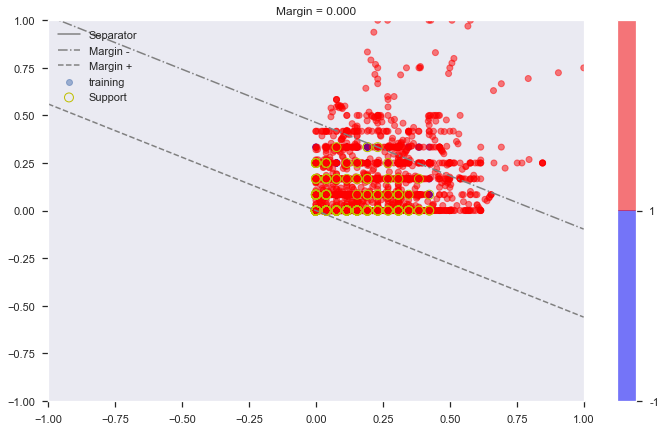

In [277]:
fig,ax = plt.subplots(1, figsize=(12,7))
plotSvm(X_train, y_train, model.supportVectors, model.w, model.b,
        label = "training", ax = ax)

In [13]:
X_test.shape

(3083, 7)

In [18]:
model.w.type()

AttributeError: 'NoneType' object has no attribute 'type'

In [282]:
class MaxMarginClassifier:
    def __init__(self, C):

        self.alpha = None
        self.w = None
        self. supportVectors = None
        self.C = C
    
    def fit(self, X, y):
        #nsamples, nfeatures = X.shape
        #self.w = np.zeros(nfeatures)
        #self.b = 0
        
        N = len(y)
        # Gram Matrix of x,y
        Xy = X*y[:, np.newaxis ]

        GramXy = np.matmul(Xy, Xy.T)
        #G = np.dot(GramXy.T, GramXy)

        def Ld0(G, alpha):
            obj_fn = alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))
            return obj_fn


        def particalDerivationLd0(G, alpha):
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der


        alpha = np.ones(N)

        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C*np.ones(N)))
        constraint = ({'type': 'eq','fun': lambda a: np.dot(a,y),'jac': lambda a:y},
                       {'type': 'ineq','fun': lambda a: b - np.dot(A,a), 'jac': lambda a:-A})
        OptRes = optimize.minimize(fun = lambda a: - Ld0(GramXy, a),
                                   x0 = alpha,
                                   method = "SLSQP",
                                   jac =  lambda a: - particalDerivationLd0(GramXy, a), constraints= constraint)
        self.alpha =  OptRes.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 0
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]

        b = []
        
        for i in range(len(self.supportLabels)):
            bi = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            
            b.append(bi)
        self.b = sum(b)/(len(b))
        
          
    def predict(self, X):
        return 2*(np.matmul(X,self.w)+self.b > 0 ) - 1
  

In [283]:
model = MaxMarginClassifier(C=10)

In [284]:
model.fit(X_train[:1000],y_train[:1000])

In [285]:
result = pd.DataFrame(data=np.column_stack((y_test,y_predict)),columns=['Actual','Prediction'])


In [287]:
TN = len(result[(result.Actual==-1) & (result.Prediction==-1)])
TP = len(result[(result.Actual==1) & (result.Prediction==1)])
FP = len(result[(result.Actual==-1) & (result.Prediction==1)])
FN = len(result[(result.Actual==1) & (result.Prediction==-1)])
Total = len(result)
print('Model Accuracy is: ', (TP + TN) / Total)
#print('Model Precision is: ', (TP / (TP + FP)))
print('Model Recall is: ', (TP / (TP + FN)))
print('F1 score is: ', (TP / (TP + 0.5*(FP + FN))))

Model Accuracy is:  0.808235294117647
Model Recall is:  0.0
F1 score is:  0.0


In [288]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
print(' |-----Act-----')
#print('--0-------1--')
print('P|--|-1------1--')
print('r|-1',cm[0])
print('e|1',cm[1])

 |-----Act-----
P|--|-1------1--
r|-1 [2061    0]
e|1 [489   0]


Number of support vectors = 491


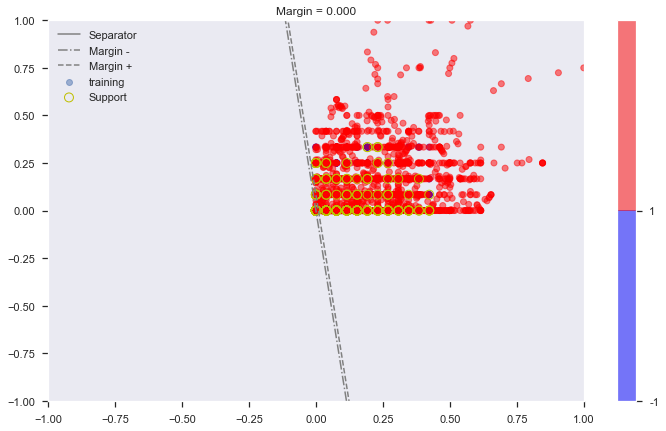

In [289]:
fig,ax = plt.subplots(1, figsize=(12,7))
plotSvm(X_train, y_train, model.supportVectors, model.w, model.b,
        label = "training", ax = ax)